# #Classification using Tensorflow

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\user\TF_2_Notebooks_and_Data\DATA\cancer_classification.csv')
df.shape

(569, 31)

In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

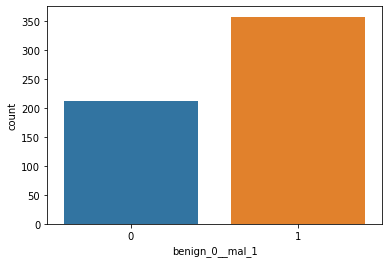

In [5]:
sns.countplot(df['benign_0__mal_1'])

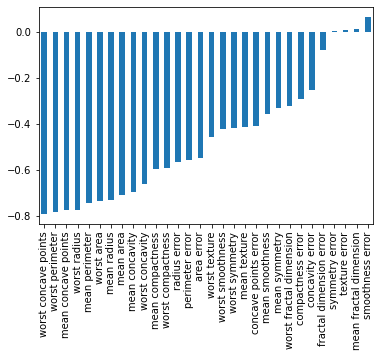

In [37]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind = 'bar')

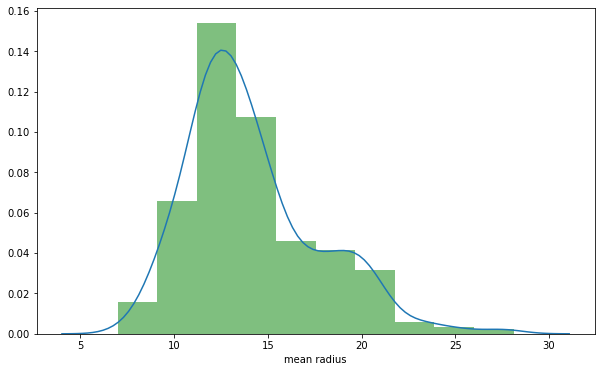

In [34]:
plt.figure(figsize = (10,6))
sns.distplot(df['mean radius'],bins = 10,label = 'hist of mean radius',hist_kws={"linewidth": 3,
                                                                                 "alpha": 0.5, "color": "g"})

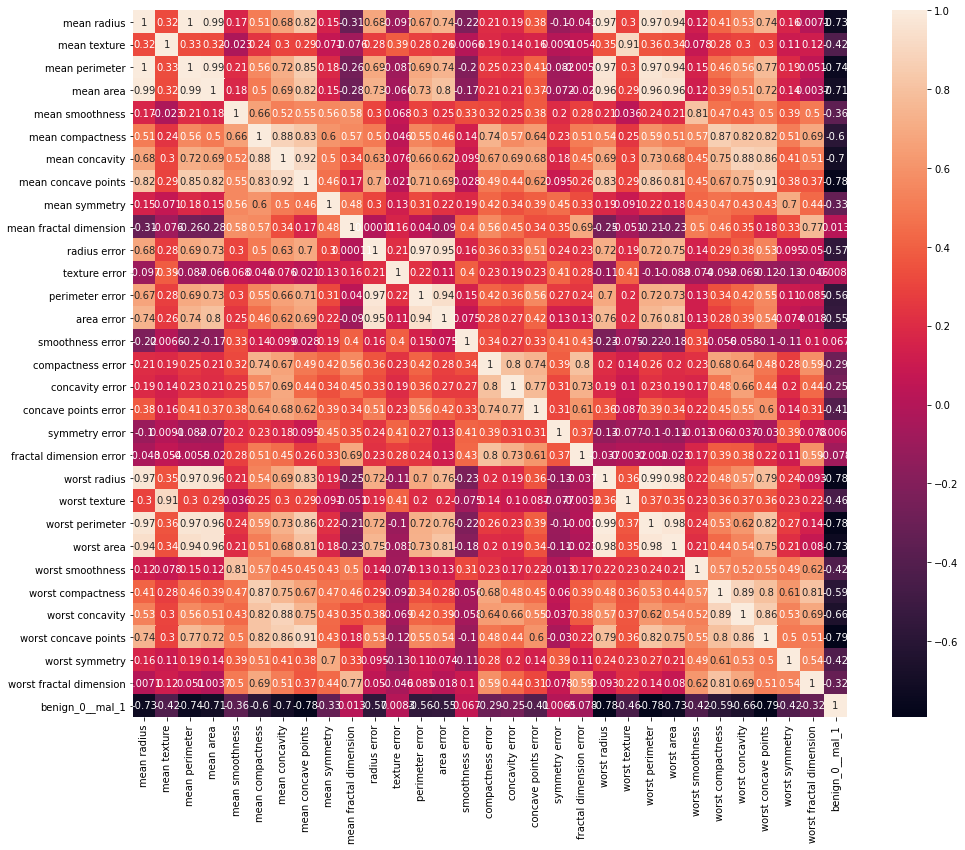

In [42]:
plt.figure(figsize = (16,13))
sns.heatmap(df.corr(),annot = True)

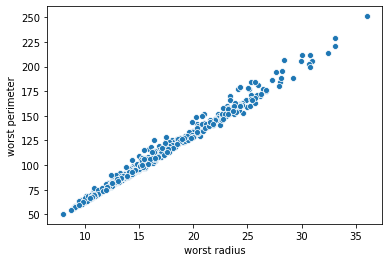

In [44]:
sns.scatterplot(x = 'worst radius',y = 'worst perimeter',data = df)

In [45]:
x = df.drop('benign_0__mal_1',axis = 1).values
y = df['benign_0__mal_1'].values

In [46]:
from sklearn.model_selection import train_test_split


In [48]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
scaler = MinMaxScaler()

In [51]:
X_train = scaler.fit_transform(X_train)

In [53]:
X_test = scaler.transform(X_test)

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [55]:
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer = 'adam',loss = 'binary_crossentropy')


In [56]:
from tensorflow.keras.callbacks import EarlyStopping

In [58]:
early_stop = EarlyStopping(monitor = 'val_loss',mode ='min',verbose = 1,patience = 25)

In [59]:
model.fit(x=X_train,y= y_train,validation_data = (X_test,y_test),epochs = 400,callbacks = [early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/400
426/426 [==============================] - 1s 2ms/sample - loss: 0.7028 - val_loss: 0.6766
Epoch 2/400
426/426 [==============================] - 0s 141us/sample - loss: 0.6456 - val_loss: 0.6207
Epoch 3/400
426/426 [==============================] - 0s 126us/sample - loss: 0.5958 - val_loss: 0.5783
Epoch 4/400
426/426 [==============================] - 0s 117us/sample - loss: 0.5546 - val_loss: 0.5327
Epoch 5/400
426/426 [==============================] - 0s 113us/sample - loss: 0.5094 - val_loss: 0.4860
Epoch 6/400
426/426 [==============================] - 0s 130us/sample - loss: 0.4635 - val_loss: 0.4375
Epoch 7/400
426/426 [==============================] - 0s 126us/sample - loss: 0.4177 - val_loss: 0.3922
Epoch 8/400
426/426 [==============================] - 0s 123us/sample - loss: 0.3731 - val_loss: 0.3464
Epoch 9/400
426/426 [==============================] - 0s 112us/sample - loss: 0.3325 - val_loss: 0.3056
Epoch 10/40

Epoch 78/400
426/426 [==============================] - 0s 106us/sample - loss: 0.0491 - val_loss: 0.1173
Epoch 79/400
426/426 [==============================] - 0s 106us/sample - loss: 0.0478 - val_loss: 0.1148
Epoch 80/400
426/426 [==============================] - 0s 113us/sample - loss: 0.0513 - val_loss: 0.1217
Epoch 81/400
426/426 [==============================] - 0s 109us/sample - loss: 0.0481 - val_loss: 0.1194
Epoch 82/400
426/426 [==============================] - 0s 115us/sample - loss: 0.0507 - val_loss: 0.1200
Epoch 83/400
426/426 [==============================] - 0s 110us/sample - loss: 0.0578 - val_loss: 0.1228
Epoch 00083: early stopping


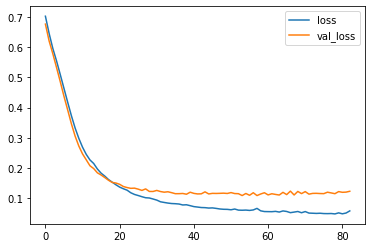

In [61]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [62]:
from tensorflow.keras.layers import Dropout

In [63]:
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer = 'adam',loss = 'binary_crossentropy')

In [64]:
model.fit(x=X_train,y= y_train,validation_data = (X_test,y_test),epochs = 400,callbacks = [early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/400
426/426 [==============================] - 1s 2ms/sample - loss: 0.6970 - val_loss: 0.6715
Epoch 2/400
426/426 [==============================] - 0s 124us/sample - loss: 0.6814 - val_loss: 0.6538
Epoch 3/400
426/426 [==============================] - 0s 129us/sample - loss: 0.6549 - val_loss: 0.6377
Epoch 4/400
426/426 [==============================] - 0s 120us/sample - loss: 0.6556 - val_loss: 0.6219
Epoch 5/400
426/426 [==============================] - 0s 134us/sample - loss: 0.6316 - val_loss: 0.6033
Epoch 6/400
426/426 [==============================] - 0s 128us/sample - loss: 0.6289 - val_loss: 0.5816
Epoch 7/400
426/426 [==============================] - 0s 117us/sample - loss: 0.5963 - val_loss: 0.5564
Epoch 8/400
426/426 [==============================] - 0s 120us/sample - loss: 0.5617 - val_loss: 0.5213
Epoch 9/400
426/426 [==============================] - 0s 119us/sample - loss: 0.5524 - val_loss: 0.4884
Epoch 10/40

Epoch 78/400
426/426 [==============================] - 0s 127us/sample - loss: 0.1104 - val_loss: 0.1180
Epoch 79/400
426/426 [==============================] - 0s 117us/sample - loss: 0.1165 - val_loss: 0.1095
Epoch 80/400
426/426 [==============================] - 0s 120us/sample - loss: 0.1099 - val_loss: 0.1141
Epoch 81/400
426/426 [==============================] - 0s 118us/sample - loss: 0.1152 - val_loss: 0.1146
Epoch 82/400
426/426 [==============================] - 0s 127us/sample - loss: 0.1115 - val_loss: 0.1140
Epoch 83/400
426/426 [==============================] - 0s 125us/sample - loss: 0.1277 - val_loss: 0.1122
Epoch 84/400
426/426 [==============================] - 0s 121us/sample - loss: 0.1338 - val_loss: 0.1108
Epoch 85/400
426/426 [==============================] - 0s 123us/sample - loss: 0.1104 - val_loss: 0.1249
Epoch 86/400
426/426 [==============================] - 0s 114us/sample - loss: 0.1161 - val_loss: 0.1228
Epoch 87/400
426/426 [========================

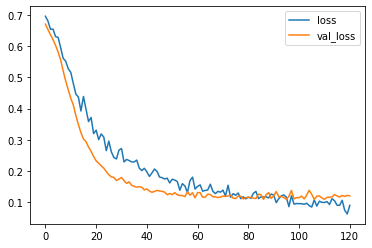

In [65]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [67]:
predictions = model.predict_classes(X_test)

In [68]:
from sklearn.metrics import classification_report,confusion_matrix


In [69]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [70]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]
